In [39]:
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.colors import Normalize
import numpy as np
import torch 
from data.oasis.load_oasis3 import give_oasis_data
from data.uk_biobank.load_ukb import give_ukb_data

from sklearn.manifold import TSNE
from mpl_toolkits.axes_grid1 import ImageGrid
from mpl_toolkits.axes_grid1 import make_axes_locatable



In [40]:
folder="/well/win-fmrib-analysis/users/lhw539/visualization/"
tech='tsne'
df_age_plot_age=pd.read_csv(folder+"ukb_run_0_"+tech+"_labelage_pretrained_on_age_3000_samples.csv")
df_age_plot_sex=pd.read_csv(folder+"ukb_run_0_"+tech+"_labelsex_pretrained_on_age_3000_samples.csv")


df_sex_plot_age=pd.read_csv(folder+"ukb_run_0_"+tech+"_labelage_pretrained_on_sex_3000_samples.csv")
df_sex_plot_sex=pd.read_csv(folder+"ukb_run_0_"+tech+"_labelsex_pretrained_on_sex_3000_samples.csv")


In [41]:
# x_min=df["COMP1"].min()
# x_max=df["COMP1"].max()
# y_min=df["COMP2"].min()
# y_max=df["COMP2"].max()
# n_grid_points=20
# x_points=np.linspace(x_min,x_max,n_grid_points)

# y_points=np.linspace(y_min,y_max,n_grid_points)
#for n_x in range(n_grid_points):
#    for n_y in range(n_grid_points):
#        ax.scatter(x_points[n_x],y_points[n_y],color='black',alpha=0.2,marker='x')
#norm=Normalize(vmin=df['label'].min(),vmax=df['label'].max())

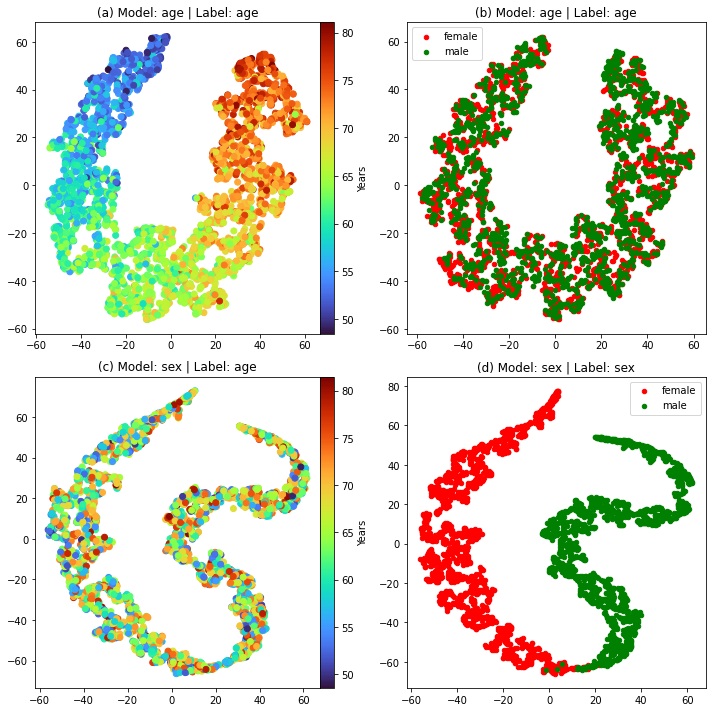

In [42]:
#Colormap:
cmap=plt.cm.turbo
pad=0.
#Create figure:
fig,ax=plt.subplots(ncols=2,nrows=2,figsize=(10,10),gridspec_kw={
                           'width_ratios': [1, 1],
                           'height_ratios': [1, 1]})

#Plot age on manifold given by model pre-trained on age:
pm=ax[0,0].scatter(df_age_plot_age["COMP1"].to_numpy(),df_age_plot_age["COMP2"].to_numpy(),marker='o', cmap=cmap,c=df_age_plot_age['label'])
divider = make_axes_locatable(ax[0,0])
cax1 = divider.append_axes("right", size="5%", pad=pad)
cbar=fig.colorbar(pm, cax=cax1)
cbar.ax.set_ylabel("Years")
ax[0,0].set_title("(a) Model: age | Label: age")


#Plot age on manifold given by model pre-trained on sex:
pm=ax[1,0].scatter(df_sex_plot_age["COMP1"].to_numpy(),df_sex_plot_age["COMP2"].to_numpy(),marker='o', cmap=cmap,c=df_sex_plot_age['label'])
divider = make_axes_locatable(ax[1,0])
cax2 = divider.append_axes("right", size="5%", pad=pad)
cbar=fig.colorbar(pm, cax=cax2)
cbar.ax.set_ylabel("Years")
ax[1,0].set_title("(c) Model: sex | Label: age")




colors = {'0':'red', '1':'green'}
names= {'0':'female', '1':'male'}

df_age_plot_sex["label"]=df_age_plot_sex["label"].astype(int).astype(str)
grouped = df_age_plot_sex.groupby('label')
for key, group in grouped:
    group.plot(ax=ax[0,1], kind='scatter', x='COMP1', y='COMP2', label=names[key], color=colors[key])
ax[0,1].set_title("(b) Model: age | Label: age")
ax[0,1].set_xlabel("")
ax[0,1].set_ylabel("")

df_sex_plot_sex["label"]=df_sex_plot_sex["label"].astype(int).astype(str)
grouped = df_sex_plot_sex.groupby('label')
for key, group in grouped:
    group.plot(ax=ax[1,1], kind='scatter', x='COMP1', y='COMP2', label=names[key], color=colors[key])
ax[1,1].set_title("(d) Model: sex | Label: sex")
ax[1,1].set_xlabel("")
ax[1,1].set_ylabel("")

plt.tight_layout(h_pad=1)
# #Plot age on manifold given by model pre-trained on age:
# pm=ax[0,2].scatter(df_abide_plot_age["COMP1"].to_numpy(),df_abide_plot_age["COMP2"].to_numpy(),marker='o', cmap=cmap,c=df_abide_plot_age['label'])
# fig.colorbar(pm,ax=ax[0,2])
# ax[0,2].set_title("Model: age | Label: age | Data: ABIDE")


# ax[1,2].set_title("Model: sex | Label: sex | Data: ABIDE")

plt.savefig("visualization/plots/preliminary_visualization_features.png")


In [43]:
tech='tsne'
df_oasis_plot_age=pd.read_csv(folder+"oasis_run_0_"+tech+"_labelage_pretrained_on_age_355_samples.csv")
df_abide_plot_age=pd.read_csv(folder+"abide_run_0_"+tech+"_labelage_pretrained_on_age_536_samples.csv")
df_ixi_plot_age=pd.read_csv(folder+"ixi_run_0_"+tech+"_labelage_pretrained_on_age_215_samples.csv")

df_oasis_plot_sex=pd.read_csv(folder+"oasis_run_0_"+tech+"_labelsex_pretrained_on_sex_355_samples.csv")
df_abide_plot_sex=pd.read_csv(folder+"abide_run_0_"+tech+"_labelsex_pretrained_on_sex_536_samples.csv")
df_ixi_plot_sex=pd.read_csv(folder+"ixi_run_0_"+tech+"_labelsex_pretrained_on_sex_215_samples.csv")

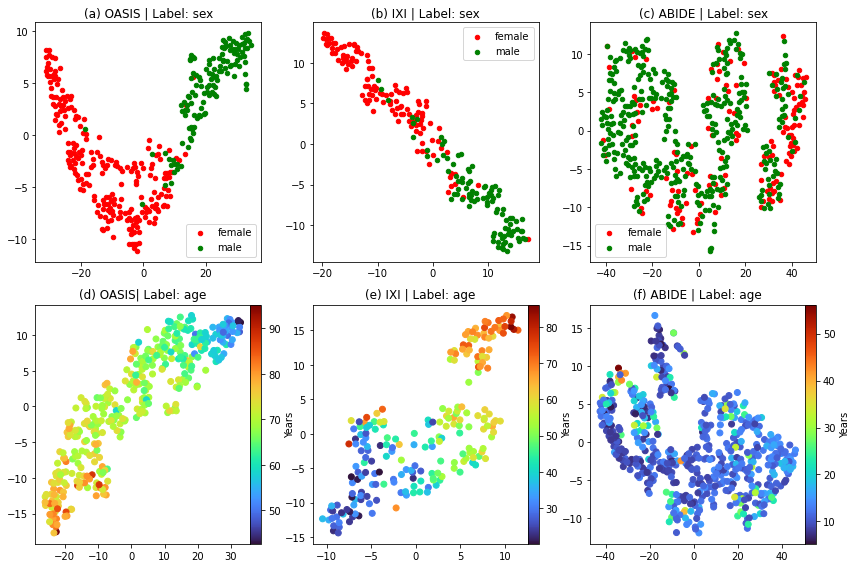

In [44]:
#Create figure:
fig,ax=plt.subplots(ncols=3,nrows=2,figsize=(12,8),gridspec_kw={
                           'width_ratios': [1, 1,1],
                           'height_ratios': [1,1]})
pad=.0
df_oasis_plot_sex["label"]=df_oasis_plot_sex["label"].astype(int).astype(str)
grouped = df_oasis_plot_sex.groupby('label')
for key, group in grouped:
    group.plot(ax=ax[0,0], kind='scatter', x='COMP1', y='COMP2', label=names[key], color=colors[key])
ax[0,0].set_title("(a) OASIS | Label: sex")
ax[0,0].set_xlabel("")
ax[0,0].set_ylabel("")

pm=ax[1,0].scatter(df_oasis_plot_age["COMP1"].to_numpy(),df_oasis_plot_age["COMP2"].to_numpy(),marker='o', cmap=cmap,c=df_oasis_plot_age['label'])
divider = make_axes_locatable(ax[1,0])
cax1 = divider.append_axes("right", size="5%", pad=pad)
cbar=fig.colorbar(pm, cax=cax1)
cbar.ax.set_ylabel("Years")
ax[1,0].set_title("(d) OASIS| Label: age")

df_ixi_plot_sex["label"]=df_ixi_plot_sex["label"].astype(int).astype(str)
grouped = df_ixi_plot_sex.groupby('label')
for key, group in grouped:
    group.plot(ax=ax[0,1], kind='scatter', x='COMP1', y='COMP2', label=names[key], color=colors[key])

ax[0,1].set_title("(b) IXI | Label: sex")
ax[0,1].set_xlabel("")
ax[0,1].set_ylabel("")

pm=ax[1,1].scatter(df_ixi_plot_age["COMP1"].to_numpy(),df_ixi_plot_age["COMP2"].to_numpy(),marker='o', cmap=cmap,c=df_ixi_plot_age['label'])
divider = make_axes_locatable(ax[1,1])
cax1 = divider.append_axes("right", size="5%", pad=pad)
cbar=fig.colorbar(pm, cax=cax1)
cbar.ax.set_ylabel("Years")
ax[1,1].set_title("(e) IXI | Label: age")


df_abide_plot_sex["label"]=df_abide_plot_sex["label"].astype(int).astype(str)
grouped = df_abide_plot_sex.groupby('label')
for key, group in grouped:
    group.plot(ax=ax[0,2], kind='scatter', x='COMP1', y='COMP2', label=names[key], color=colors[key])
ax[0,2].set_title("(c) ABIDE | Label: sex")
ax[0,2].set_xlabel("")
ax[0,2].set_ylabel("")
#ax[0,1].set_ylim(-0.5,0.5)

pm=ax[1,2].scatter(df_abide_plot_age["COMP1"].to_numpy(),df_abide_plot_age["COMP2"].to_numpy(),marker='o', cmap=cmap,c=df_abide_plot_age['label'])
divider = make_axes_locatable(ax[1,2])
cax1 = divider.append_axes("right", size="5%", pad=pad)
cbar=fig.colorbar(pm, cax=cax1)
cbar.ax.set_ylabel("Years")
ax[1,2].set_title("(f) ABIDE | Label: age")
#ax[1,1].set_xlim(-5,5)
#ax[1,1].set_ylim(-2,2)



plt.tight_layout(h_pad=1,w_pad=-1)
plt.savefig("visualization/plots/confusion_of_features_by_site_transfer.png")


df_oasis_plot_confusion=pd.read_csv(folder+"oasis_run_1_"+tech+"_labelsex_pretrained_on_sex_355_samples.csv")

In [45]:
df_oasis_plot_confusion=pd.read_csv("/well/win-fmrib-analysis/users/lhw539/visualization/oasis_run_oasis_1_tsne_labelsex_pretrained_on_sex_686_samples.csv")
df_abide_plot_confusion=pd.read_csv("/well/win-fmrib-analysis/users/lhw539/visualization/abide_run_abide_3_tsne_labelage_pretrained_on_age_536_samples.csv")


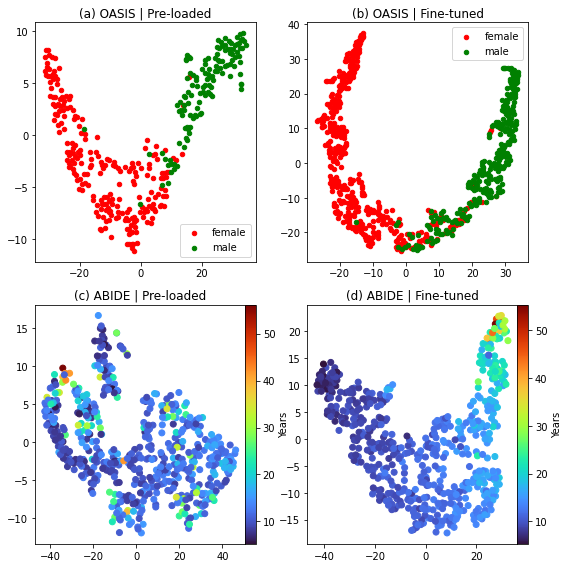

In [46]:
#Create figure:
fig,ax=plt.subplots(ncols=2,nrows=2,figsize=(8,8),gridspec_kw={
                           'width_ratios': [1, 1],
                           'height_ratios': [1,1]})
pad=.0
df_oasis_plot_sex["label"]=df_oasis_plot_sex["label"].astype(int).astype(str)
grouped = df_oasis_plot_sex.groupby('label')
for key, group in grouped:
    group.plot(ax=ax[0,0], kind='scatter', x='COMP1', y='COMP2', label=names[key], color=colors[key])
ax[0,0].set_title("(a) OASIS | Pre-loaded")
ax[0,0].set_xlabel("")
ax[0,0].set_ylabel("")

df_oasis_plot_confusion["label"]=df_oasis_plot_confusion["label"].astype(int).astype(str)
grouped = df_oasis_plot_confusion.groupby('label')
for key, group in grouped:
    group.plot(ax=ax[0,1], kind='scatter', x='COMP1', y='COMP2', label=names[key], color=colors[key])
ax[0,1].set_title("(b) OASIS | Fine-tuned")
ax[0,1].set_xlabel("")
ax[0,1].set_ylabel("")



pm=ax[1,0].scatter(df_abide_plot_age["COMP1"].to_numpy(),df_abide_plot_age["COMP2"].to_numpy(),marker='o', cmap=cmap,c=df_abide_plot_age['label'])
divider = make_axes_locatable(ax[1,0])
cax1 = divider.append_axes("right", size="5%", pad=pad)
cbar=fig.colorbar(pm, cax=cax1)
cbar.ax.set_ylabel("Years")
ax[1,0].set_title("(c) ABIDE | Pre-loaded")

pm=ax[1,1].scatter(df_abide_plot_confusion["COMP1"].to_numpy(),df_abide_plot_confusion["COMP2"].to_numpy(),marker='o', cmap=cmap,c=df_abide_plot_confusion['label'])
divider = make_axes_locatable(ax[1,1])
cax1 = divider.append_axes("right", size="5%", pad=pad)
cbar=fig.colorbar(pm, cax=cax1)
cbar.ax.set_ylabel("Years")
ax[1,1].set_title("(d) ABIDE | Fine-tuned")

# pm=ax[1,2].scatter(df_abide_plot_confusion["COMP1"].to_numpy(),df_abide_plot_confusion["COMP2"].to_numpy(),marker='o', cmap=cmap,c=df_abide_plot_confusion['label'])
# divider = make_axes_locatable(ax[1,2])
# cax1 = divider.append_axes("right", size="5%", pad=pad)
# cbar=fig.colorbar(pm, cax=cax1)
# cbar.ax.set_ylabel("Years")
# ax[1,2].set_title("(d) ABIDE | Fine-tuned")

plt.tight_layout(h_pad=1,w_pad=-1)
plt.savefig("visualization/plots/confusion_after_training.png")


In [47]:
df_oasis_plot_confusion=pd.read_csv("/well/win-fmrib-analysis/users/lhw539/visualization/oasis_run_oasis_1_age_ft_tsne_labelage_pretrained_on_age_686_samples.csv")

df_oasis_plot_scratch=pd.read_csv("/well/win-fmrib-analysis/users/lhw539/visualization/oasis_run_oasis_1_age_scratch_tsne_labelage_pretrained_on_age_686_samples.csv")

df_abide_plot_scratch=pd.read_csv("/well/win-fmrib-analysis/users/lhw539/visualization/abide_run_abide_1_age_scratch_tsne_labelage_pretrained_on_age_536_samples.csv")

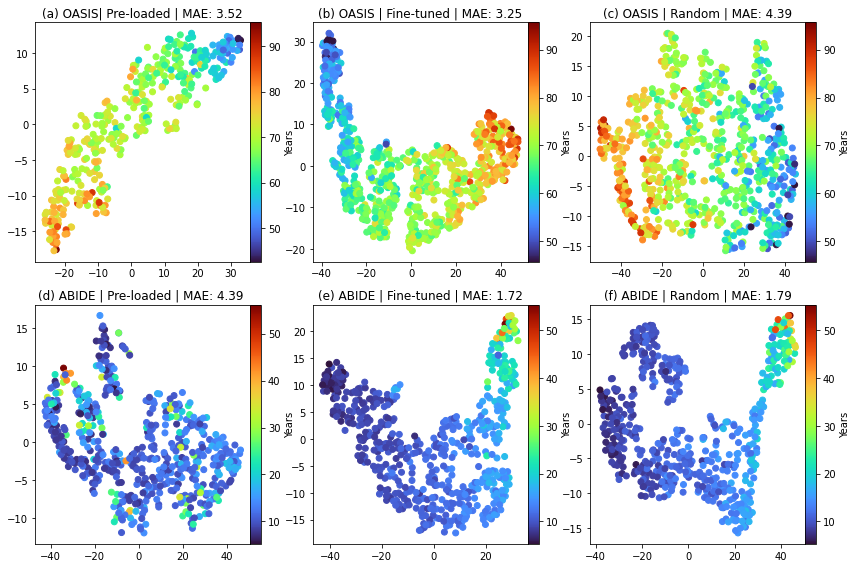

In [48]:
#Create figure:
fig,ax=plt.subplots(ncols=3,nrows=2,figsize=(12,8),gridspec_kw={
                           'width_ratios': [1, 1,1],
                           'height_ratios': [1,1]})
pad=.0
# df_oasis_plot_age["label"]=df_oasis_plot_sex["label"].astype(int).astype(str)
# grouped = df_oasis_plot_sex.groupby('label')
# for key, group in grouped:
#     group.plot(ax=ax[0,0], kind='scatter', x='COMP1', y='COMP2', label=names[key], color=colors[key])
# ax[0,0].set_title("(a) OASIS | Pre-loaded")
# ax[0,0].set_xlabel("")
# ax[0,0].set_ylabel("")

# df_oasis_plot_confusion["label"]=df_oasis_plot_confusion["label"].astype(int).astype(str)
# grouped = df_oasis_plot_confusion.groupby('label')
# for key, group in grouped:
#     group.plot(ax=ax[0,1], kind='scatter', x='COMP1', y='COMP2', label=names[key], color=colors[key])
# ax[0,1].set_title("(b) OASIS | Fine-tuned")
# ax[0,1].set_xlabel("")
# ax[0,1].set_ylabel("")

pm=ax[0,0].scatter(df_oasis_plot_age["COMP1"].to_numpy(),df_oasis_plot_age["COMP2"].to_numpy(),marker='o', cmap=cmap,c=df_oasis_plot_age['label'])
divider = make_axes_locatable(ax[0,0])
cax1 = divider.append_axes("right", size="5%", pad=pad)
cbar=fig.colorbar(pm, cax=cax1)
cbar.ax.set_ylabel("Years")
ax[0,0].set_title("(a) OASIS| Pre-loaded | MAE: 3.52")

pm=ax[0,1].scatter(df_oasis_plot_confusion["COMP1"].to_numpy(),df_oasis_plot_confusion["COMP2"].to_numpy(),marker='o', cmap=cmap,c=df_oasis_plot_confusion['label'])
divider = make_axes_locatable(ax[0,1])
cax1 = divider.append_axes("right", size="5%", pad=pad)
cbar=fig.colorbar(pm, cax=cax1)
cbar.ax.set_ylabel("Years")
ax[0,1].set_title("(b) OASIS | Fine-tuned | MAE: 3.25")

pm=ax[0,2].scatter(-df_oasis_plot_scratch["COMP1"].to_numpy(),df_oasis_plot_scratch["COMP2"].to_numpy(),marker='o', cmap=cmap,c=df_oasis_plot_scratch['label'])
divider = make_axes_locatable(ax[0,2])
cax1 = divider.append_axes("right", size="5%", pad=pad)
cbar=fig.colorbar(pm, cax=cax1)
cbar.ax.set_ylabel("Years")
ax[0,2].set_title("(c) OASIS | Random | MAE: 4.39")


pm=ax[1,0].scatter(df_abide_plot_age["COMP1"].to_numpy(),df_abide_plot_age["COMP2"].to_numpy(),marker='o', cmap=cmap,c=df_abide_plot_age['label'])
divider = make_axes_locatable(ax[1,0])
cax1 = divider.append_axes("right", size="5%", pad=pad)
cbar=fig.colorbar(pm, cax=cax1)
cbar.ax.set_ylabel("Years")
ax[1,0].set_title("(d) ABIDE | Pre-loaded | MAE: 4.39 ")

pm=ax[1,1].scatter(df_abide_plot_confusion["COMP1"].to_numpy(),df_abide_plot_confusion["COMP2"].to_numpy(),marker='o', cmap=cmap,c=df_abide_plot_confusion['label'])
divider = make_axes_locatable(ax[1,1])
cax1 = divider.append_axes("right", size="5%", pad=pad)
cbar=fig.colorbar(pm, cax=cax1)
cbar.ax.set_ylabel("Years")
ax[1,1].set_title("(e) ABIDE | Fine-tuned | MAE: 1.72")

pm=ax[1,2].scatter(-df_abide_plot_scratch["COMP1"].to_numpy(),df_abide_plot_scratch["COMP2"].to_numpy(),marker='o', cmap=cmap,c=df_abide_plot_scratch['label'])
divider = make_axes_locatable(ax[1,2])
cax1 = divider.append_axes("right", size="5%", pad=pad)
cbar=fig.colorbar(pm, cax=cax1)
cbar.ax.set_ylabel("Years")
ax[1,2].set_title("(f) ABIDE | Random | MAE: 1.79")

plt.tight_layout(h_pad=1,w_pad=-1)
plt.savefig("visualization/plots/confusion_after_training_with_scratch.png")


In [49]:
train_dataset,_=give_ukb_data('test', batch_size=5,
                                        num_workers=4,
                                        shuffle=False,
                                        debug=False,
                                        preprocessing='min',
                                        task='age',
                                        share=1.)
df=df_age_plot_age
n_grid_points=20
x_points=np.linspace(df[["COMP1"]].values.min(),df[["COMP1"]].values.max(),n_grid_points)
y_points=np.linspace(df[["COMP1"]].values.min(),df[["COMP1"]].values.max(),n_grid_points)                                                  

Loading share 1.00 of UKB  test data.


In [ ]:
fig,ax=plt.subplots(nrows=n_grid_points,ncols=n_grid_points,figsize=(40,60))
slice=80
threshold=3.
for n_x in range(n_grid_points):
    for n_y in range(n_grid_points):
        grid_point=np.array([x_points[n_x],y_points[n_y]])
        data_tsne=df[["COMP1","COMP2"]].values
        dist=np.linalg.norm(data_tsne-grid_point[None,:],axis=1)
        if dist.min()<threshold:
            idx=np.argmin(dist)
            image,label=train_dataset.get_data(idx)
            image=image.squeeze()
            image_slice=image[:,:,slice]
            image_slice_rot=np.rot90(image_slice)
            ax[-n_y-1,n_x].imshow(image_slice_rot,'gray')
        ax[-n_y,n_x].axis('off')

plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig("visualization/plots/brain_manifold.png")
